## Nabila Hannania
## 13519097

sebelum menjalankan program download dataset pada link : https://drive.google.com/file/d/1Krl9JvjsuOLB7_H5OuLfPMdM6Yjou2dJ/view?usp=sharing 
<br>
Ekstrak file tersebut, kemudian upload folder hasil ekstraksi ke folder "MyDrive" pada google drive akun yang Anda gunakan untuk membuka file google colab ini.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_labels = pd.read_csv('drive/MyDrive/data_worthcheck/labels.txt', sep=" ", header=None)
df_labels_labels = list(df_labels[0])
df_labels_labels

['no', 'yes']

## Read data

In [ ]:
train_data = pd.read_csv('drive/MyDrive/data_worthcheck/train.csv')
train_data

,Unnamed: 0,text_a,label
0,0,betewe buka twitter cuman ngetweet liat home b...,no
1,1,mas piyuuu mugo2 corona tuh mulut tersumpal ma...,no
2,2,e100ss gini buka informasi sejelas nya identit...,yes
3,3,neng solo wes ono terduga corona cobo neng ati...,no
4,4,midiahn nii akun gak takut takut nya isu coron...,no
...,...,...,...
21596,21596,depok panas ga karuan kereta sampe pasming huj...,no
21597,21597,oxfara arie kriting yg lebi goblo nya orang ke...,no
21598,21598,virus corona menyaba depok cuci tangan makan n...,no
21599,21599,mata sipit tinggal depok udah abis dah bahan c...,no


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Training Data')

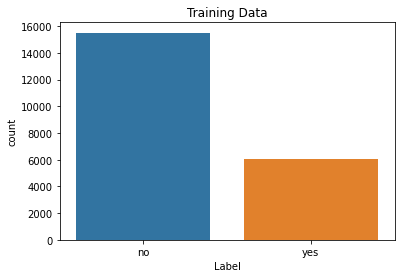

In [ ]:
# persebaran data training
sns.countplot(train_data.label)
plt.xlabel('Label')
plt.title('Training Data')

In [ ]:
dev_data = pd.read_csv('drive/MyDrive/data_worthcheck/dev.csv')
dev_data

,text_a,label
0,jek dajal ga depok bang,no
1,detikcom untung depok masuk wilayah nya ridwan...,no
2,df dom jakarta depok yg gunain vc cabang nya c...,no
3,your2rl depok jkt,no
4,doakan indonesia selamat virus corona pkb depo...,yes
...,...,...
2795,ku tenang2 bae ku sih ya corona nya ga depok k...,no
2796,guru hati hati ya virus corona uda indonesia t...,yes
2797,4 terawan menyebut virus corona indonesia terd...,yes
2798,realffk buhari can t pronounce corona virus,no


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Validation (dev) Data')

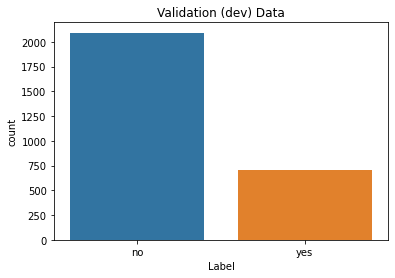

In [ ]:
# persebaran data validation (dev)
sns.countplot(dev_data.label)
plt.xlabel('Label')
plt.title('Validation (dev) Data')

In [ ]:
test_data = pd.read_csv('drive/MyDrive/data_worthcheck/test.csv')
test_data

,text_a,label
0,jek dajal ga depok bang,no
1,detikcom untung depok masuk wilayah nya ridwan...,no
2,df dom jakarta depok yg gunain vc cabang nya c...,no
3,your2rl depok jkt,no
4,doakan indonesia selamat virus corona pkb depo...,yes
...,...,...
2795,ku tenang2 bae ku sih ya corona nya ga depok k...,no
2796,guru hati hati ya virus corona uda indonesia t...,yes
2797,4 terawan menyebut virus corona indonesia terd...,yes
2798,realffk buhari can t pronounce corona virus,no


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Testing Data')

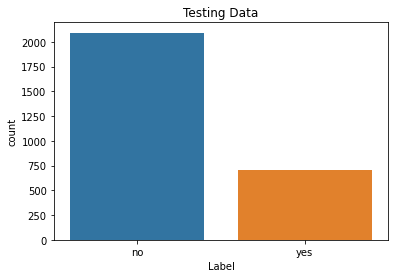

In [ ]:
# persebaran data testing
sns.countplot(test_data.label)
plt.xlabel('Label')
plt.title('Testing Data')

## Preprocessing Data

In [ ]:
# 1. Removing Blank Spaces
train_data['text_a'].dropna(inplace=True)
dev_data['text_a'].dropna(inplace=True)
test_data['text_a'].dropna(inplace=True)

# 2. Changing all text to lowercase
train_data['text_original'] = train_data['text_a']
train_data['text_a'] = [entry.lower() for entry in train_data['text_a']]

dev_data['text_original'] = dev_data['text_a']
dev_data['text_a'] = [entry.lower() for entry in dev_data['text_a']]

test_data['text_original'] = test_data['text_a']
test_data['text_a'] = [entry.lower() for entry in test_data['text_a']]


# 3. Tokenization
# each entry in the dataset corpus will be broken into set of words
train_data['text_a']= [word_tokenize(entry) for entry in train_data['text_a']]
dev_data['text_a']= [word_tokenize(entry) for entry in dev_data['text_a']]
test_data['text_a']= [word_tokenize(entry) for entry in test_data['text_a']]

In [ ]:
# 4. Remove Stop words and Non-alphabet word
stop_words = set(stopwords.words('indonesian'))

# remove stopword and Non-alphabet word in train data
for index, entry in enumerate (train_data['text_a']):
  Final_words = []
  for word in entry:
      # Below condition is to check for Stop words and consider only alphabets
      # jika hanya terdapat alfabet pada kata
      if word.isalpha() :
        if word not in stop_words :
            Final_words.append(word)
        
      # jika terdapat bukan alfabet pada kata
      else :
        # check apakah kata tersebut merupakan pengulangan kata
        if word[-1] == "2":
          if word[:-1] not in stop_words:
            Final_words.append(word[:-1])

  # The final processed set of words for each iteration will be stored in 'text_final'
  train_data.loc[index, 'text_final'] = str(Final_words)

# remove stopword and Non-alphabet word in dev data
for index, entry in enumerate (dev_data['text_a']):
  Final_words = []
  for word in entry:
      # Below condition is to check for Stop words and consider only alphabets
      # jika hanya terdapat alfabet pada kata
      if word.isalpha() :
        if word not in stop_words :
            Final_words.append(word)
        
      # jika terdapat bukan alfabet pada kata
      else :
        # check apakah kata tersebut merupakan pengulangan kata
        if word[-1] == "2":
          if word[:-1] not in stop_words:
            Final_words.append(word[:-1])
            
  # The final processed set of words for each iteration will be stored in 'text_final'
  dev_data.loc[index, 'text_final'] = str(Final_words)

# remove stopword and Non-alphabet word in test data
for index, entry in enumerate (test_data['text_a']):
  Final_words = []
  for word in entry:
      # Below condition is to check for Stop words and consider only alphabets
      # jika hanya terdapat alfabet pada kata
      if word.isalpha() :
        if word not in stop_words :
            Final_words.append(word)
        
      # jika terdapat bukan alfabet pada kata
      else :
        # check apakah kata tersebut merupakan pengulangan kata
        if word[-1] == "2":
          if word[:-1] not in stop_words:
            Final_words.append(word[:-1])

  # The final processed set of words for each iteration will be stored in 'text_final'
  test_data.loc[index, 'text_final'] = str(Final_words)

In [ ]:
train_data

,Unnamed: 0,text_a,label,text_original,text_final
0,0,"[betewe, buka, twitter, cuman, ngetweet, liat,...",no,betewe buka twitter cuman ngetweet liat home b...,"['betewe', 'buka', 'twitter', 'cuman', 'ngetwe..."
1,1,"[mas, piyuuu, mugo2, corona, tuh, mulut, tersu...",no,mas piyuuu mugo2 corona tuh mulut tersumpal ma...,"['mas', 'piyuuu', 'mugo', 'corona', 'tuh', 'mu..."
2,2,"[e100ss, gini, buka, informasi, sejelas, nya, ...",yes,e100ss gini buka informasi sejelas nya identit...,"['gini', 'buka', 'informasi', 'sejelas', 'nya'..."
3,3,"[neng, solo, wes, ono, terduga, corona, cobo, ...",no,neng solo wes ono terduga corona cobo neng ati...,"['neng', 'solo', 'wes', 'ono', 'terduga', 'cor..."
4,4,"[midiahn, nii, akun, gak, takut, takut, nya, i...",no,midiahn nii akun gak takut takut nya isu coron...,"['midiahn', 'nii', 'akun', 'gak', 'takut', 'ta..."
...,...,...,...,...,...
21596,21596,"[depok, panas, ga, karuan, kereta, sampe, pasm...",no,depok panas ga karuan kereta sampe pasming huj...,"['depok', 'panas', 'ga', 'karuan', 'kereta', '..."
21597,21597,"[oxfara, arie, kriting, yg, lebi, goblo, nya, ...",no,oxfara arie kriting yg lebi goblo nya orang ke...,"['oxfara', 'arie', 'kriting', 'yg', 'lebi', 'g..."
21598,21598,"[virus, corona, menyaba, depok, cuci, tangan, ...",no,virus corona menyaba depok cuci tangan makan n...,"['virus', 'corona', 'menyaba', 'depok', 'cuci'..."
21599,21599,"[mata, sipit, tinggal, depok, udah, abis, dah,...",no,mata sipit tinggal depok udah abis dah bahan c...,"['mata', 'sipit', 'tinggal', 'depok', 'udah', ..."


In [ ]:
dev_data

,text_a,label,text_original,text_final
0,"[jek, dajal, ga, depok, bang]",no,jek dajal ga depok bang,"['jek', 'dajal', 'ga', 'depok', 'bang']"
1,"[detikcom, untung, depok, masuk, wilayah, nya,...",no,detikcom untung depok masuk wilayah nya ridwan...,"['detikcom', 'untung', 'depok', 'masuk', 'wila..."
2,"[df, dom, jakarta, depok, yg, gunain, vc, caba...",no,df dom jakarta depok yg gunain vc cabang nya c...,"['df', 'dom', 'jakarta', 'depok', 'yg', 'gunai..."
3,"[your2rl, depok, jkt]",no,your2rl depok jkt,"['depok', 'jkt']"
4,"[doakan, indonesia, selamat, virus, corona, pk...",yes,doakan indonesia selamat virus corona pkb depo...,"['doakan', 'indonesia', 'selamat', 'virus', 'c..."
...,...,...,...,...
2795,"[ku, tenang2, bae, ku, sih, ya, corona, nya, g...",no,ku tenang2 bae ku sih ya corona nya ga depok k...,"['ku', 'tenang', 'bae', 'ku', 'sih', 'ya', 'co..."
2796,"[guru, hati, hati, ya, virus, corona, uda, ind...",yes,guru hati hati ya virus corona uda indonesia t...,"['guru', 'hati', 'hati', 'ya', 'virus', 'coron..."
2797,"[4, terawan, menyebut, virus, corona, indonesi...",yes,4 terawan menyebut virus corona indonesia terd...,"['terawan', 'menyebut', 'virus', 'corona', 'in..."
2798,"[realffk, buhari, can, t, pronounce, corona, v...",no,realffk buhari can t pronounce corona virus,"['realffk', 'buhari', 'can', 't', 'pronounce',..."


In [ ]:
test_data

,text_a,label,text_original,text_final
0,"[jek, dajal, ga, depok, bang]",no,jek dajal ga depok bang,"['jek', 'dajal', 'ga', 'depok', 'bang']"
1,"[detikcom, untung, depok, masuk, wilayah, nya,...",no,detikcom untung depok masuk wilayah nya ridwan...,"['detikcom', 'untung', 'depok', 'masuk', 'wila..."
2,"[df, dom, jakarta, depok, yg, gunain, vc, caba...",no,df dom jakarta depok yg gunain vc cabang nya c...,"['df', 'dom', 'jakarta', 'depok', 'yg', 'gunai..."
3,"[your2rl, depok, jkt]",no,your2rl depok jkt,"['depok', 'jkt']"
4,"[doakan, indonesia, selamat, virus, corona, pk...",yes,doakan indonesia selamat virus corona pkb depo...,"['doakan', 'indonesia', 'selamat', 'virus', 'c..."
...,...,...,...,...
2795,"[ku, tenang2, bae, ku, sih, ya, corona, nya, g...",no,ku tenang2 bae ku sih ya corona nya ga depok k...,"['ku', 'tenang', 'bae', 'ku', 'sih', 'ya', 'co..."
2796,"[guru, hati, hati, ya, virus, corona, uda, ind...",yes,guru hati hati ya virus corona uda indonesia t...,"['guru', 'hati', 'hati', 'ya', 'virus', 'coron..."
2797,"[4, terawan, menyebut, virus, corona, indonesi...",yes,4 terawan menyebut virus corona indonesia terd...,"['terawan', 'menyebut', 'virus', 'corona', 'in..."
2798,"[realffk, buhari, can, t, pronounce, corona, v...",no,realffk buhari can t pronounce corona virus,"['realffk', 'buhari', 'can', 't', 'pronounce',..."


## Split Data

In [ ]:
# split data to X dan Y
Train_X = train_data['text_final']
Train_Y = train_data['label']

Dev_X = dev_data['text_final']
Dev_Y = dev_data['label']

Test_X = test_data['text_final']
Test_Y = test_data['label']

In [ ]:
print("Train_X : \n", Train_X)
print("Train_Y : \n", Train_Y)
print("Dev_X : \n", Dev_X)
print("Dev_Y : \n", Dev_Y)
print("Test_X : \n", Test_X)
print("Test_Y : \n", Test_Y)

Train_X : 
 0        ['betewe', 'buka', 'twitter', 'cuman', 'ngetwe...
1        ['mas', 'piyuuu', 'mugo', 'corona', 'tuh', 'mu...
2        ['gini', 'buka', 'informasi', 'sejelas', 'nya'...
3        ['neng', 'solo', 'wes', 'ono', 'terduga', 'cor...
4        ['midiahn', 'nii', 'akun', 'gak', 'takut', 'ta...
                               ...                        
21596    ['depok', 'panas', 'ga', 'karuan', 'kereta', '...
21597    ['oxfara', 'arie', 'kriting', 'yg', 'lebi', 'g...
21598    ['virus', 'corona', 'menyaba', 'depok', 'cuci'...
21599    ['mata', 'sipit', 'tinggal', 'depok', 'udah', ...
21600    ['i', 'ak', 'batuk', 'pilek', 'pusing', 'demam...
Name: text_final, Length: 21601, dtype: object
Train_Y : 
 0         no
1         no
2        yes
3         no
4         no
        ... 
21596     no
21597     no
21598     no
21599     no
21600     no
Name: label, Length: 21601, dtype: object
Dev_X : 
 0                 ['jek', 'dajal', 'ga', 'depok', 'bang']
1       ['detikcom', 'untun

## Transform Label from Categorical to Numerical

In [ ]:
# Transformasi data kategorikal menjadi numerikal : dengan menggunakan labelEncoder
# untuk label yang bernilai "no" akan diubah menjadi 0
# untuk label yang bernilai "yesy" akan diubah menjadi 1
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Dev_Y = Encoder.fit_transform(Dev_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [ ]:
print("Train_Y : \n", Train_Y)
print("Dev_Y : \n", Dev_Y)
print("Test_Y : \n", Test_Y)

Train_Y : 
 [0 0 1 ... 0 0 0]
Dev_Y : 
 [0 0 0 ... 1 0 1]
Test_Y : 
 [0 0 0 ... 1 0 1]


## Feature Extraction
Fitur yang penting pada dataset akan direpresentasikan dalam bentuk matrix TF-IDF (Term Frequency-Inverse Document Frequency). TF-IDF sendiri  dapat mengukur relevansi suatu kata dalam dokumen di antara kumpulan dokumen

In [ ]:
Tfidf_vect = TfidfVectorizer()

# vocabulary-nya harus menggunakan semua kata pada dataset, namun karena dataset test dan dev berisi data yang sama maka hanya akan digunakan data train dan dev untuk membuat vocabulary pada TD-IDF vector
corpus = [*Train_X, *Dev_X]
Tfidf_vect.fit(corpus)

print(Tfidf_vect.vocabulary_)

{'betewe': 4519, 'buka': 5665, 'twitter': 39696, 'cuman': 7341, 'ngetweet': 26790, 'liat': 21224, 'home': 14517, 'berita': 4007, 'corona': 7103, 'panik': 28605, 'kepikiran': 18800, 'ndamau': 26170, 'yg': 42157, 'aware': 2438, 'aja': 695, 'll': 21417, 'stay': 36448, 'at': 2242, 'nda': 26157, 'rumah': 33328, 'kalo': 17553, 'banget': 3003, 'mas': 22506, 'piyuuu': 30571, 'mugo': 25457, 'tuh': 39436, 'mulut': 25554, 'tersumpal': 38379, 'ma': 21750, 'gini': 12910, 'informasi': 15582, 'sejelas': 34429, 'nya': 27526, 'identitas': 14982, 'daerah': 7469, 'penderita': 29459, 'terjangkit': 38193, 'infokan': 15554, 'masyarakat': 22641, 'mengisolasi': 23939, 'kontak': 19935, 'langsung': 20807, 'positif': 31025, 'ditutup': 9878, 'tutupi': 39647, 'neng': 26314, 'solo': 36100, 'wes': 41362, 'ono': 28029, 'terduga': 38112, 'cobo': 6882, 'ati': 2278, 'mu': 25392, 'conora': 7012, 'midiahn': 24622, 'nii': 27021, 'akun': 890, 'gak': 12277, 'takut': 37343, 'isu': 16040, 'wkwkwkw': 41577, 'hey': 14220, 'prrgi

In [ ]:
# tranformasi data ke dalam bentuk representasi Tf-IDF
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Dev_X_Tfidf = Tfidf_vect.transform(Dev_X)
Test_X_Tfidf = Tfidf_vect.transform(Dev_X)

print("Train_X_Tfidf : \n", Train_X_Tfidf)
print("Dev_X_Tfidf : \n", Dev_X_Tfidf)
print("Test_X_Tfidf : \n", Test_X_Tfidf)

Train_X_Tfidf : 
   (0, 42157)	0.07211955948402651
  (0, 39696)	0.16378510417996398
  (0, 36448)	0.14629037547117013
  (0, 33328)	0.11310629536409932
  (0, 28605)	0.127332645002353
  (0, 26790)	0.22315656481169938
  (0, 26170)	0.24380636208465664
  (0, 26157)	0.40916435749932556
  (0, 21417)	0.22691342581270174
  (0, 21224)	0.1385833248965482
  (0, 18800)	0.18463884703959682
  (0, 17553)	0.10201131274080398
  (0, 14517)	0.5136177553777482
  (0, 7341)	0.16440213347593355
  (0, 7103)	0.0484512389705409
  (0, 5665)	0.272226454479427
  (0, 4519)	0.24380636208465664
  (0, 4007)	0.11931836496483827
  (0, 3003)	0.12251661538860471
  (0, 2438)	0.18689011005265785
  (0, 2242)	0.16288789775783422
  (0, 695)	0.09100460750584304
  (1, 39436)	0.26676468961532396
  (1, 38379)	0.49432149522768765
  (1, 30571)	0.3431033169141745
  :	:
  (21598, 4674)	0.20522817147643452
  (21598, 3422)	0.2761330843717857
  (21599, 39791)	0.1440067190017826
  (21599, 39020)	0.2543148913206524
  (21599, 38787)	0.1945036

## Training Model Baseline

In [ ]:
# Classifier - Algorithm - SVM
# trainig model baseline
SVM = SVC(C=3, kernel='linear')
SVM.fit(Train_X_Tfidf,Train_Y)

SVC(C=3, kernel='linear')

In [ ]:
# predict the labels on training dataset
predictions_SVM = SVM.predict(Train_X_Tfidf)

# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score on Training Data -> ",accuracy_score(predictions_SVM, Train_Y)*100)

SVM Accuracy Score on Training Data ->  97.61122170269894


In [ ]:
print(classification_report(Train_Y,predictions_SVM))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     15512
           1       0.95      0.97      0.96      6089

    accuracy                           0.98     21601
   macro avg       0.97      0.97      0.97     21601
weighted avg       0.98      0.98      0.98     21601



In [ ]:
# predict the labels on testing dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)

# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score on Testing Data -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score on Testing Data ->  85.07142857142857


In [ ]:
print(classification_report(Test_Y,predictions_SVM))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2093
           1       0.69      0.73      0.71       707

    accuracy                           0.85      2800
   macro avg       0.80      0.81      0.81      2800
weighted avg       0.85      0.85      0.85      2800



# Tuning Hyperparameter
Proses tuning Hyperparameter sendiri terdiri dari beberapa tahapan :

1.   Untuk setiap fungsi kernel pada SVM, akan dicari parameter terbaiknya. Pencarian parameter terbaik untuk setiap fungsi kernel menggunakan GridSearch, dimana dataset yang digunakan untuk mencari hyperparameter untuk setiap fungsi kernel adalah training data. Digunakan training data karena pada GridSearch validation data akan dibuat secara otomatis berdasarkan training data.
Algoritma GridSearch akan membagi training set menjadi 5 fold. Dalam setiap iterasi, satu fold disisihkan sebagai validation set.
2.   Diambil beberapa model terbaik untuk setiap fungsi kernel, kemudian dibandingkan akurasinya ketika dilatih dengan train set dan diuji pada dev dataset



### Hyperparameter for 'linear' Kernel function

In [ ]:
# defining parameter range
param_grid_linear = {'C': [0.1, 1, 10, 100, 1000], 
                    'kernel': ['linear']} 
  
grid_linear = GridSearchCV(SVC(), param_grid_linear, refit = True, verbose = 3)
  
# fitting the model for grid search
grid_linear.fit(Train_X_Tfidf, Train_Y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.836 total time=  24.5s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.838 total time=  23.6s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.830 total time=  23.3s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.829 total time=  23.1s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.821 total time=  27.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.889 total time=  35.1s
[CV 2/5] END ................C=1, kernel=linear;, score=0.864 total time=  35.4s
[CV 3/5] END ................C=1, kernel=linear;, score=0.901 total time=  35.1s
[CV 4/5] END ................C=1, kernel=linear;, score=0.880 total time=  43.8s
[CV 5/5] END ................C=1, kernel=linear;, score=0.931 total time=  37.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.880 total time= 1.2min
[CV 2/5] END ...............C=10, kernel=linear;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid_linear.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_linear.best_estimator_)

# print best score of our model
print("best score:", grid_linear.best_score_)

{'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear')
best score: 0.8928755024985643


In [ ]:
df = pd.DataFrame(grid_linear.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,20.316258,1.523549,3.979527,0.130459,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.836380,0.838194,0.829861,0.829167,0.820833,0.830887,0.006143,5
1,33.824874,3.320928,3.479501,0.054218,1,linear,"{'C': 1, 'kernel': 'linear'}",0.889146,0.863889,0.901157,0.879630,0.930556,0.892876,0.022441,1
2,63.956428,6.260242,3.370167,0.053774,10,linear,"{'C': 10, 'kernel': 'linear'}",0.880120,0.840509,0.905556,0.862963,0.971065,0.892043,0.044879,2
3,59.426163,6.912942,3.170937,0.124234,100,linear,"{'C': 100, 'kernel': 'linear'}",0.874335,0.837037,0.900694,0.855787,0.972917,0.888154,0.047315,3
4,48.915757,9.731854,2.679627,0.072028,1000,linear,"{'C': 1000, 'kernel': 'linear'}",0.864846,0.824769,0.899769,0.848148,0.972454,0.881997,0.051407,4


### Hyperparameter for 'rbf' Kernel Function

In [ ]:
# defining parameter range
param_grid_rbf = {'C': [1, 10, 100, 1000], 
              'gamma': [10, 1, 0.1, 0.01],
              'kernel': ['rbf']} 
  
grid_rbf = GridSearchCV(SVC(), param_grid_rbf, refit = True, verbose = 3)
  
# fitting the model for grid search
grid_rbf.fit(Train_X_Tfidf, Train_Y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .........C=1, gamma=10, kernel=rbf;, score=0.828 total time= 2.0min
[CV 2/5] END .........C=1, gamma=10, kernel=rbf;, score=0.747 total time= 2.0min
[CV 3/5] END .........C=1, gamma=10, kernel=rbf;, score=0.850 total time= 2.2min
[CV 4/5] END .........C=1, gamma=10, kernel=rbf;, score=0.807 total time= 1.8min
[CV 5/5] END .........C=1, gamma=10, kernel=rbf;, score=0.975 total time= 2.3min
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.895 total time= 1.2min
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.858 total time= 1.2min
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.909 total time= 1.2min
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.884 total time= 1.5min
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.955 total time= 1.2min
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.851 total time=  25.4s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [10, 1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid_rbf.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_rbf.best_estimator_)

# print best score of our model
print("best score:", grid_rbf.best_score_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)
best score: 0.9081526909923114


In [ ]:
df = pd.DataFrame(grid_rbf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,115.684717,11.579358,7.236692,0.436463,1,10,rbf,"{'C': 1, 'gamma': 10, 'kernel': 'rbf'}",0.827818,0.747222,0.850000,0.807176,0.975463,0.841536,0.075196,15
1,69.173716,6.842376,5.226292,0.105994,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.895163,0.857639,0.908796,0.884259,0.955093,0.900190,0.032181,4
2,21.097445,0.296994,4.355670,0.146861,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.851423,0.845370,0.850231,0.845370,0.847454,0.847970,0.002483,11
3,22.443417,0.515914,4.843061,0.181694,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.729461,0.728704,0.724074,0.731481,0.724769,0.727698,0.002834,16
4,126.906128,15.403525,7.121416,0.474426,10,10,rbf,"{'C': 10, 'gamma': 10, 'kernel': 'rbf'}",0.828975,0.748843,0.852546,0.807176,0.975463,0.842601,0.074810,12
5,77.125201,5.785777,5.439274,0.195763,10,1,rbf,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}",0.901875,0.857870,0.916898,0.888889,0.975231,0.908153,0.038768,1
6,54.016492,5.056683,4.101626,0.128808,10,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.886137,0.856250,0.908333,0.876389,0.951620,0.895746,0.032580,5
7,20.936452,0.411477,4.321905,0.115939,10,0.01,rbf,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.851655,0.847917,0.854630,0.850926,0.854167,0.851859,0.002427,10
8,127.544605,14.577525,7.107888,0.556334,100,10,rbf,"{'C': 100, 'gamma': 10, 'kernel': 'rbf'}",0.828975,0.748843,0.852546,0.807176,0.975463,0.842601,0.074810,12
9,78.063438,5.745704,5.605049,0.311911,100,1,rbf,"{'C': 100, 'gamma': 1, 'kernel': 'rbf'}",0.901412,0.858796,0.916898,0.887037,0.975463,0.907921,0.038818,2


### Hyperparameter for 'poly' Kernel Function

In [ ]:
# defining parameter range
param_grid_poly = {'C': [0.8],
              'degree': [1, 2, 3, 4],
              'gamma': ['scale', 10, 1],
              'kernel': ['poly']} 
  
grid_poly = GridSearchCV(SVC(), param_grid_poly, refit = True, verbose = 3)
  
# fitting the model for grid search
grid_poly.fit(Train_X_Tfidf, Train_Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END C=0.8, degree=1, gamma=scale, kernel=poly;, score=0.884 total time=  30.7s
[CV 2/5] END C=0.8, degree=1, gamma=scale, kernel=poly;, score=0.867 total time=  38.1s
[CV 3/5] END C=0.8, degree=1, gamma=scale, kernel=poly;, score=0.892 total time=  29.3s
[CV 4/5] END C=0.8, degree=1, gamma=scale, kernel=poly;, score=0.878 total time=  37.1s
[CV 5/5] END C=0.8, degree=1, gamma=scale, kernel=poly;, score=0.919 total time=  30.9s
[CV 1/5] END C=0.8, degree=1, gamma=10, kernel=poly;, score=0.876 total time=  59.0s
[CV 2/5] END C=0.8, degree=1, gamma=10, kernel=poly;, score=0.837 total time=  54.4s
[CV 3/5] END C=0.8, degree=1, gamma=10, kernel=poly;, score=0.905 total time=  58.2s
[CV 4/5] END C=0.8, degree=1, gamma=10, kernel=poly;, score=0.859 total time=  56.7s
[CV 5/5] END C=0.8, degree=1, gamma=10, kernel=poly;, score=0.971 total time= 1.1min
[CV 1/5] END C=0.8, degree=1, gamma=1, kernel=poly;, score=0.884 total tim

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.8], 'degree': [1, 2, 3, 4],
                         'gamma': ['scale', 10, 1], 'kernel': ['poly']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid_poly.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_poly.best_estimator_)

# print best score of our model
print("best score:", grid_poly.best_score_)

{'C': 0.8, 'degree': 2, 'gamma': 10, 'kernel': 'poly'}
SVC(C=0.8, degree=2, gamma=10, kernel='poly')
best score: 0.8920423513075677


In [ ]:
df = pd.DataFrame(grid_poly.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,29.831154,3.579260,3.401851,0.058337,0.8,1,scale,poly,"{'C': 0.8, 'degree': 1, 'gamma': 'scale', 'ker...",0.883823,0.867130,0.892361,0.878009,0.918981,0.888061,0.017502,3
1,55.764358,3.990845,3.147194,0.039646,0.8,1,10,poly,"{'C': 0.8, 'degree': 1, 'gamma': 10, 'kernel':...",0.876186,0.837037,0.904630,0.859028,0.971296,0.889635,0.046428,2
2,28.543812,2.758454,3.537546,0.229150,0.8,1,1,poly,"{'C': 0.8, 'degree': 1, 'gamma': 1, 'kernel': ...",0.883823,0.866898,0.892361,0.878009,0.919213,0.888061,0.017640,3
3,72.259203,3.355577,5.955672,0.214520,0.8,2,scale,poly,"{'C': 0.8, 'degree': 2, 'gamma': 'scale', 'ker...",0.878500,0.827315,0.889352,0.859259,0.956713,0.882228,0.042792,6
4,89.109700,7.688519,5.766266,0.289795,0.8,2,10,poly,"{'C': 0.8, 'degree': 2, 'gamma': 10, 'kernel':...",0.885212,0.833565,0.899769,0.868287,0.973380,0.892042,0.046273,1
5,71.740839,2.790335,5.944163,0.192752,0.8,2,1,poly,"{'C': 0.8, 'degree': 2, 'gamma': 1, 'kernel': ...",0.878269,0.827315,0.889352,0.859259,0.956944,0.882228,0.042877,5
6,78.515976,8.064723,6.439794,0.364684,0.8,3,scale,poly,"{'C': 0.8, 'degree': 3, 'gamma': 'scale', 'ker...",0.846795,0.773380,0.866898,0.823380,0.970139,0.856118,0.064994,8
7,122.664263,12.443790,6.289253,0.243724,0.8,3,10,poly,"{'C': 0.8, 'degree': 3, 'gamma': 10, 'kernel':...",0.848878,0.776852,0.866204,0.825000,0.972685,0.857924,0.064772,7
8,77.912126,7.341287,6.271462,0.295633,0.8,3,1,poly,"{'C': 0.8, 'degree': 3, 'gamma': 1, 'kernel': ...",0.846332,0.773380,0.866898,0.823611,0.970139,0.856072,0.064985,9
9,85.151635,8.542412,6.475238,0.329882,0.8,4,scale,poly,"{'C': 0.8, 'degree': 4, 'gamma': 'scale', 'ker...",0.837306,0.760417,0.858333,0.813426,0.974306,0.848758,0.070764,11


### Hyperparameter for 'sigmoid' Kernel Function

In [ ]:
# defining parameter range
param_grid_sig = {'C': [0.5, 0.6, 0.8, 1],
              'degree': [3],
              'gamma': ['scale', 10, 1, 0.1],
              'kernel': ['sigmoid']} 
  
grid_sig = GridSearchCV(SVC(), param_grid_sig, refit = True, verbose = 3)
  
# fitting the model for grid search
grid_sig.fit(Train_X_Tfidf, Train_Y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END C=0.5, degree=3, gamma=scale, kernel=sigmoid;, score=0.870 total time=  21.8s
[CV 2/5] END C=0.5, degree=3, gamma=scale, kernel=sigmoid;, score=0.866 total time=  21.7s
[CV 3/5] END C=0.5, degree=3, gamma=scale, kernel=sigmoid;, score=0.873 total time=  22.0s
[CV 4/5] END C=0.5, degree=3, gamma=scale, kernel=sigmoid;, score=0.867 total time=  21.4s
[CV 5/5] END C=0.5, degree=3, gamma=scale, kernel=sigmoid;, score=0.882 total time=  21.7s
[CV 1/5] END C=0.5, degree=3, gamma=10, kernel=sigmoid;, score=0.782 total time=  15.2s
[CV 2/5] END C=0.5, degree=3, gamma=10, kernel=sigmoid;, score=0.797 total time=  14.6s
[CV 3/5] END C=0.5, degree=3, gamma=10, kernel=sigmoid;, score=0.772 total time=  15.1s
[CV 4/5] END C=0.5, degree=3, gamma=10, kernel=sigmoid;, score=0.766 total time=  14.9s
[CV 5/5] END C=0.5, degree=3, gamma=10, kernel=sigmoid;, score=0.779 total time=  15.5s
[CV 1/5] END C=0.5, degree=3, gamma=1, kerne

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.5, 0.6, 0.8, 1], 'degree': [3],
                         'gamma': ['scale', 10, 1, 0.1],
                         'kernel': ['sigmoid']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid_sig.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_sig.best_estimator_)

# print best score of our model
print("best score:", grid_sig.best_score_)

{'C': 1, 'degree': 3, 'gamma': 1, 'kernel': 'sigmoid'}
SVC(C=1, gamma=1, kernel='sigmoid')
best score: 0.8778762524964214


In [ ]:
df = pd.DataFrame(grid_sig.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,18.261599,0.243683,3.439074,0.100563,0.5,3,scale,sigmoid,"{'C': 0.5, 'degree': 3, 'gamma': 'scale', 'ker...",0.869706,0.865972,0.872685,0.867130,0.882407,0.871580,0.005886,8
1,12.929625,0.343190,2.142879,0.065090,0.5,3,10,sigmoid,"{'C': 0.5, 'degree': 3, 'gamma': 10, 'kernel':...",0.781995,0.796991,0.771528,0.766204,0.779398,0.779223,0.010508,13
2,18.445197,0.380835,3.459070,0.089973,0.5,3,1,sigmoid,"{'C': 0.5, 'degree': 3, 'gamma': 1, 'kernel': ...",0.869706,0.865972,0.872685,0.867130,0.882639,0.871626,0.005971,7
3,21.269064,0.175990,4.318898,0.085481,0.5,3,0.1,sigmoid,"{'C': 0.5, 'degree': 3, 'gamma': 0.1, 'kernel'...",0.795881,0.797222,0.784028,0.791435,0.776620,0.789037,0.007731,12
4,18.476256,0.169109,3.448660,0.091623,0.6,3,scale,sigmoid,"{'C': 0.6, 'degree': 3, 'gamma': 'scale', 'ker...",0.872715,0.867130,0.875231,0.871296,0.890741,0.875423,0.008097,6
5,12.617117,0.398438,2.119847,0.062952,0.6,3,10,sigmoid,"{'C': 0.6, 'degree': 3, 'gamma': 10, 'kernel':...",0.784078,0.795139,0.768750,0.764815,0.773148,0.777186,0.011048,14
6,18.470560,0.324417,3.446907,0.098428,0.6,3,1,sigmoid,"{'C': 0.6, 'degree': 3, 'gamma': 1, 'kernel': ...",0.872715,0.867130,0.875463,0.871296,0.890741,0.875469,0.008097,5
7,21.212342,0.407210,4.307342,0.113961,0.6,3,0.1,sigmoid,"{'C': 0.6, 'degree': 3, 'gamma': 0.1, 'kernel'...",0.807221,0.808333,0.796759,0.801389,0.786343,0.800009,0.008007,11
8,18.198399,0.402310,3.343030,0.067598,0.8,3,scale,sigmoid,"{'C': 0.8, 'degree': 3, 'gamma': 'scale', 'ker...",0.873178,0.865741,0.876620,0.870833,0.896991,0.876673,0.010758,4
9,12.894421,0.658138,2.148131,0.128169,0.8,3,10,sigmoid,"{'C': 0.8, 'degree': 3, 'gamma': 10, 'kernel':...",0.765795,0.779167,0.768287,0.761806,0.774537,0.769918,0.006202,15


## Train some best model for each kernel function and test it to validation (dev) dataset to get hyperparameter for final SVM model

### Best model of 'linear' kernel function

In [ ]:
# best model 1
SVM_Hyper_linear = SVC(C=1, kernel='linear')
SVM_Hyper_linear.fit(Train_X_Tfidf,Train_Y)

# predict the labels on dev dataset
predictions_SVM_Hyper_Linear = SVM_Hyper_linear.predict(Dev_X_Tfidf)
print("SVM Hyper Linear 1 Accuracy Score -> ",accuracy_score(predictions_SVM_Hyper_Linear, Dev_Y)*100)

SVM Hyper Linear 1 Accuracy Score ->  86.64285714285714


In [ ]:
# best model 2
SVM_Hyper_linear = SVC(C=10, kernel='linear')
SVM_Hyper_linear.fit(Train_X_Tfidf,Train_Y)

# predict the labels on dev dataset
predictions_SVM_Hyper_Linear = SVM_Hyper_linear.predict(Dev_X_Tfidf)
print("SVM Hyper Linear 2 Accuracy Score -> ",accuracy_score(predictions_SVM_Hyper_Linear, Dev_Y)*100)

SVM Hyper Linear 2 Accuracy Score ->  83.78571428571429


### Best model of 'rbf' kernel function

In [ ]:
# best model 1
SVM_Hyper_rbf = SVC(C=10, gamma=1)
SVM_Hyper_rbf.fit(Train_X_Tfidf,Train_Y)

# predict the labels on dev dataset
predictions_SVM_Hyper_rbf = SVM_Hyper_rbf.predict(Dev_X_Tfidf)
print("SVM Hyper rbf 1 Accuracy Score -> ",accuracy_score(predictions_SVM_Hyper_rbf, Dev_Y)*100)

SVM Hyper rbf 1 Accuracy Score ->  86.96428571428572


In [ ]:
# best model 2
SVM_Hyper_rbf = SVC(C=100, gamma=1)
SVM_Hyper_rbf.fit(Train_X_Tfidf,Train_Y)

# predict the labels on dev dataset
predictions_SVM_Hyper_rbf = SVM_Hyper_rbf.predict(Dev_X_Tfidf)
print("SVM Hyper rbf 3 Accuracy Score -> ",accuracy_score(predictions_SVM_Hyper_rbf, Dev_Y)*100)

SVM Hyper rbf 3 Accuracy Score ->  86.92857142857143


In [ ]:
# best model 3
SVM_Hyper_rbf = SVC(C=1000, gamma=1)
SVM_Hyper_rbf.fit(Train_X_Tfidf,Train_Y)

# predict the labels on dev dataset
predictions_SVM_Hyper_rbf = SVM_Hyper_rbf.predict(Dev_X_Tfidf)
print("SVM Hyper rbf 2 Accuracy Score -> ",accuracy_score(predictions_SVM_Hyper_rbf, Dev_Y)*100)

SVM Hyper rbf 2 Accuracy Score ->  86.92857142857143


In [ ]:
# best model 4
SVM_Hyper_rbf = SVC(C=1, gamma=1)
SVM_Hyper_rbf.fit(Train_X_Tfidf,Train_Y)

# predict the labels on dev dataset
predictions_SVM_Hyper_rbf = SVM_Hyper_rbf.predict(Dev_X_Tfidf)
print("SVM Hyper rbf 4 Accuracy Score -> ",accuracy_score(predictions_SVM_Hyper_rbf, Dev_Y)*100)

SVM Hyper rbf 4 Accuracy Score ->  87.07142857142857


In [ ]:
# best model 5
SVM_Hyper_rbf = SVC(C=10, gamma=0.1)
SVM_Hyper_rbf.fit(Train_X_Tfidf,Train_Y)

# predict the labels on dev dataset
predictions_SVM_Hyper_rbf = SVM_Hyper_rbf.predict(Dev_X_Tfidf)
print("SVM Hyper rbf 5 Accuracy Score -> ",accuracy_score(predictions_SVM_Hyper_rbf, Dev_Y)*100)

SVM Hyper rbf 5 Accuracy Score ->  85.57142857142857


### Best model of 'poly' kernel function

In [ ]:
# best model 1
SVM_Hyper_poly = SVC(C=0.8, degree=2, gamma=10, kernel='poly')
SVM_Hyper_poly.fit(Train_X_Tfidf,Train_Y)

# predict the labels on dev dataset
predictions_SVM_Hyper_poly = SVM_Hyper_poly.predict(Dev_X_Tfidf)
print("SVM Hyper poly 1 Accuracy Score -> ",accuracy_score(predictions_SVM_Hyper_poly, Dev_Y)*100)

SVM Hyper poly 1 Accuracy Score ->  85.03571428571428


In [ ]:
# best model 2
SVM_Hyper_poly = SVC(C=0.8, degree=1, gamma=10, kernel='poly')
SVM_Hyper_poly.fit(Train_X_Tfidf,Train_Y)

# predict the labels on dev dataset
predictions_SVM_Hyper_poly = SVM_Hyper_poly.predict(Dev_X_Tfidf)
print("SVM Hyper poly 2 Accuracy Score -> ",accuracy_score(predictions_SVM_Hyper_poly, Dev_Y)*100)

SVM Hyper poly 2 Accuracy Score ->  84.07142857142857


In [ ]:
# best model 3
SVM_Hyper_poly = SVC(C=0.8, degree=1, gamma=1, kernel='poly')
SVM_Hyper_poly.fit(Train_X_Tfidf,Train_Y)

# predict the labels on dev dataset
predictions_SVM_Hyper_poly = SVM_Hyper_poly.predict(Dev_X_Tfidf)
print("SVM Hyper poly 3 Accuracy Score -> ",accuracy_score(predictions_SVM_Hyper_poly, Dev_Y)*100)

SVM Hyper poly 3 Accuracy Score ->  86.60714285714286


In [ ]:
# best model 4
SVM_Hyper_poly = SVC(C=0.8, degree=1, gamma='scale', kernel='poly')
SVM_Hyper_poly.fit(Train_X_Tfidf,Train_Y)

# predict the labels on dev dataset
predictions_SVM_Hyper_poly = SVM_Hyper_poly.predict(Dev_X_Tfidf)
print("SVM Hyper poly 4 Accuracy Score -> ",accuracy_score(predictions_SVM_Hyper_poly, Dev_Y)*100)

SVM Hyper poly 4 Accuracy Score ->  86.60714285714286


### Best model of 'sigmoid' kernel function

In [ ]:
# best model 1
SVM_Hyper_sig = SVC(C=1, gamma=1, kernel='sigmoid')
SVM_Hyper_sig.fit(Train_X_Tfidf,Train_Y)

# predict the labels on dev dataset
predictions_SVM_Hyper_sig = SVM_Hyper_sig.predict(Dev_X_Tfidf)
print("SVM Hyper sigmoid 1 Accuracy Score -> ",accuracy_score(predictions_SVM_Hyper_sig, Dev_Y)*100)

SVM Hyper sigmoid 1 Accuracy Score ->  86.35714285714286


In [ ]:
# best model 2
SVM_Hyper_sig = SVC(C=1, gamma='scale', kernel='sigmoid')
SVM_Hyper_sig.fit(Train_X_Tfidf,Train_Y)

# predict the labels on dev dataset
predictions_SVM_Hyper_sig = SVM_Hyper_sig.predict(Dev_X_Tfidf)
print("SVM Hyper sigmoid 2 Accuracy Score -> ",accuracy_score(predictions_SVM_Hyper_sig, Dev_Y)*100)

SVM Hyper sigmoid 2 Accuracy Score ->  86.32142857142857


In [ ]:
# best model 3
SVM_Hyper_sig = SVC(C=0.8, gamma=1, kernel='sigmoid')
SVM_Hyper_sig.fit(Train_X_Tfidf,Train_Y)

# predict the labels on dev dataset
predictions_SVM_Hyper_sig = SVM_Hyper_sig.predict(Dev_X_Tfidf)
print("SVM Hyper sigmoid 3 Accuracy Score -> ",accuracy_score(predictions_SVM_Hyper_sig, Dev_Y)*100)

SVM Hyper sigmoid 3 Accuracy Score ->  86.64285714285714


## Hyperparamenter result

berdasarkan hasil tuning hyperparameter yang telah dilakukan pada kedua tahapan di atas, didapatkan bahwa paramater terbaik untuk model SVM adalah (C=1, gamma=1, kernel='rbf')

# Training Model with Hyperparameter

In [ ]:
# Classifier - Algorithm - SVM
# trainig with hyper parameter
SVM_Final = SVC(C=1, gamma=1, kernel='rbf')
SVM_Final.fit(Train_X_Tfidf,Train_Y)

SVC(C=1, gamma=1)

In [ ]:
# predict the labels on training dataset
predictions_SVM_Final = SVM_Final.predict(Train_X_Tfidf)

# Use accuracy_score function to get the accuracy
print("SVM Final Model (with hyperparameter) Accuracy Score on Training Data -> ",accuracy_score(predictions_SVM_Final, Train_Y)*100)

SVM Final Model (with hyperparameter) Accuracy Score on Training Data ->  97.81028656080737


In [ ]:
print(classification_report(Train_Y,predictions_SVM_Final))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     15512
           1       0.97      0.96      0.96      6089

    accuracy                           0.98     21601
   macro avg       0.97      0.97      0.97     21601
weighted avg       0.98      0.98      0.98     21601



In [ ]:
# predict the labels on testing dataset
predictions_SVM_Final = SVM_Final.predict(Test_X_Tfidf)

# Use accuracy_score function to get the accuracy
print("SVM Hyper Accuracy Score on Testing Data -> ",accuracy_score(predictions_SVM_Final, Test_Y)*100)

SVM Hyper Accuracy Score on Testing Data ->  87.07142857142857


In [ ]:
print(classification_report(Test_Y, predictions_SVM_Final))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2093
           1       0.82      0.63      0.71       707

    accuracy                           0.87      2800
   macro avg       0.85      0.79      0.81      2800
weighted avg       0.87      0.87      0.86      2800

